<a href="https://colab.research.google.com/github/riyagpt0251/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

load the dataset

In [ ]:
df = pd.read_csv("Fake.csv", on_bad_lines="skip", encoding='utf-8')


In [ ]:
print(df.columns)

Index(['title', 'text', 'subject', 'date', 'content'], dtype='object')


In [ ]:
print(df['subject'].unique())  # Check unique values in 'subject'


['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [ ]:
df.rename(columns={'subject': 'label'}, inplace=True)


data claening

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
    text = re.sub(r"https?://\S+|www\.\S+", '', text)  # Remove URLs
    text = re.sub(r"<.*?>+", '', text)  # Remove HTML tags
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing spaces
    return text

In [ ]:
df['content'] = df['content'].apply(clean_text)

splitting data

In [ ]:
X = df['content']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


converting text

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

train naive bayes model

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

prediction

In [ ]:
y_pred = model.predict(X_test_tfidf)

model evaluation

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.58

Classification Report:
                  precision    recall  f1-score   support

Government News       0.30      0.06      0.10       316
    Middle-east       0.23      0.13      0.17       159
           News       0.72      0.95      0.82      1821
        US_News       0.14      0.06      0.09       160
      left-news       0.35      0.15      0.21       897
       politics       0.47      0.60      0.53      1344

       accuracy                           0.58      4697
      macro avg       0.37      0.32      0.32      4697
   weighted avg       0.52      0.58      0.52      4697



confusion matrix

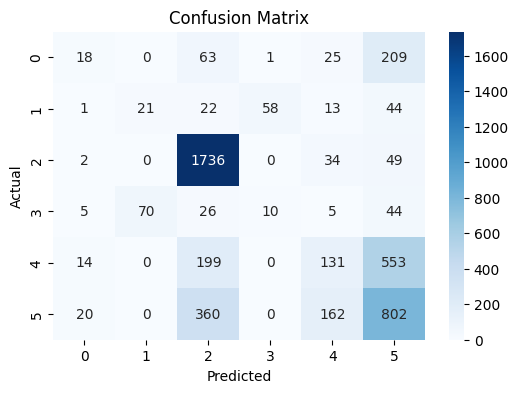

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

function for detection fake

In [22]:
def predict_news(news_text):
    news_text = clean_text(news_text)
    news_vectorized = vectorizer.transform([news_text])
    prediction = model.predict(news_vectorized)
    return "FAKE NEWS" if prediction[0] == 1 else "REAL NEWS"

# Example Usage
news = "Breaking news! The direct dbt of 72000 per month will be given to each person"
print("\nPrediction:", predict_news(news))


Prediction: REAL NEWS
